# import libraries

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import numpy as np
import matplotlib.pyplot as plt

# read and preprocess images

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

split X and y

In [3]:
X = mnist.data[:10000]
y = mnist.target[:10000]

print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")

X.shape: (10000, 784)
y.shape: (10000,)


normalize dataset

In [4]:
X = X.astype(np.float32) / 255.0

display images

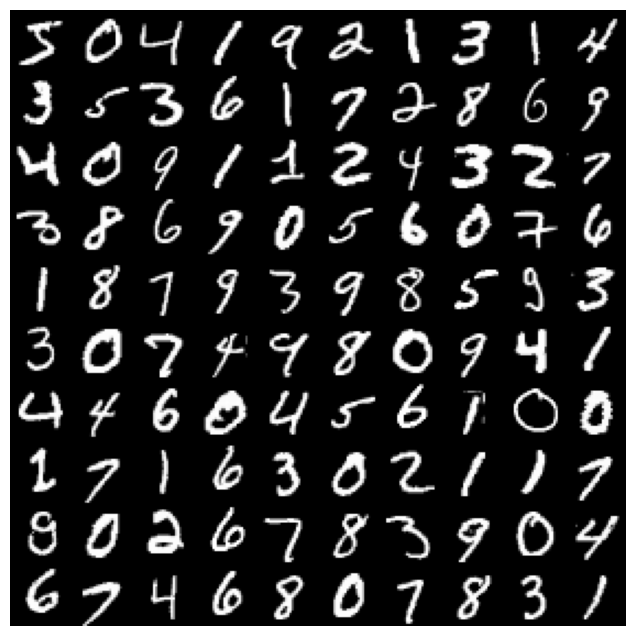

In [5]:
# take first 100 images
imgs = X[:100].reshape(100, 28, 28)

# reshape into 10x10 grid
grid = imgs.reshape(10, 10, 28, 28)

# stitch images: (rows, height, cols, width) → (rows*height, cols*width)
stitched = np.block([[grid[i, j] for j in range(10)] for i in range(10)])

plt.figure(figsize=(8, 8))
plt.imshow(stitched, cmap='gray')
plt.axis('off')
plt.show()

# train kmeans with different values of k

In [6]:
kmeans = {}
ks = list(range(8, 16))

for k in ks:
    print(f"train KMeans for K = {k} ...")
    kmeans[k] = KMeans(n_clusters=k, random_state=42).fit(X)

train KMeans for K = 8 ...


C:\Users\Windows 11\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Windows 11\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Windows 11\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Windows 11\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~

train KMeans for K = 9 ...
train KMeans for K = 10 ...
train KMeans for K = 11 ...
train KMeans for K = 12 ...
train KMeans for K = 13 ...
train KMeans for K = 14 ...
train KMeans for K = 15 ...


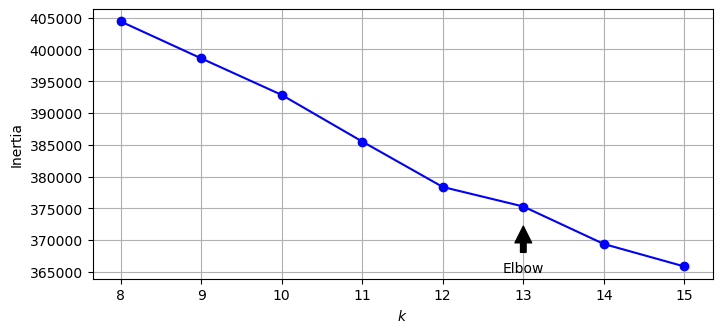

In [27]:
inertias = [kmeans[k].inertia_ for k in ks]

plt.figure(figsize=(8, 3.5))
plt.plot(ks, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(13, inertias[5]), xytext=(13, 365000),
             arrowprops=dict(facecolor='black', shrink=0.3))
plt.text(13, 365000, "Elbow", horizontalalignment="center")
plt.grid()

plt.show()

silhouette scores

In [30]:
silhouette_scores = [silhouette_score(X, kmeans[k].labels_)
                     for k in ks]

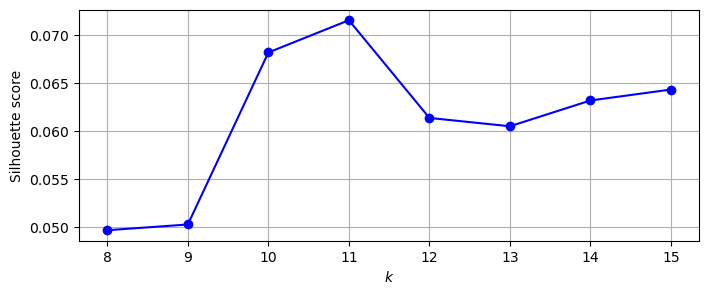

In [33]:
plt.figure(figsize=(8, 3))
plt.plot(ks, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.grid()
plt.show()

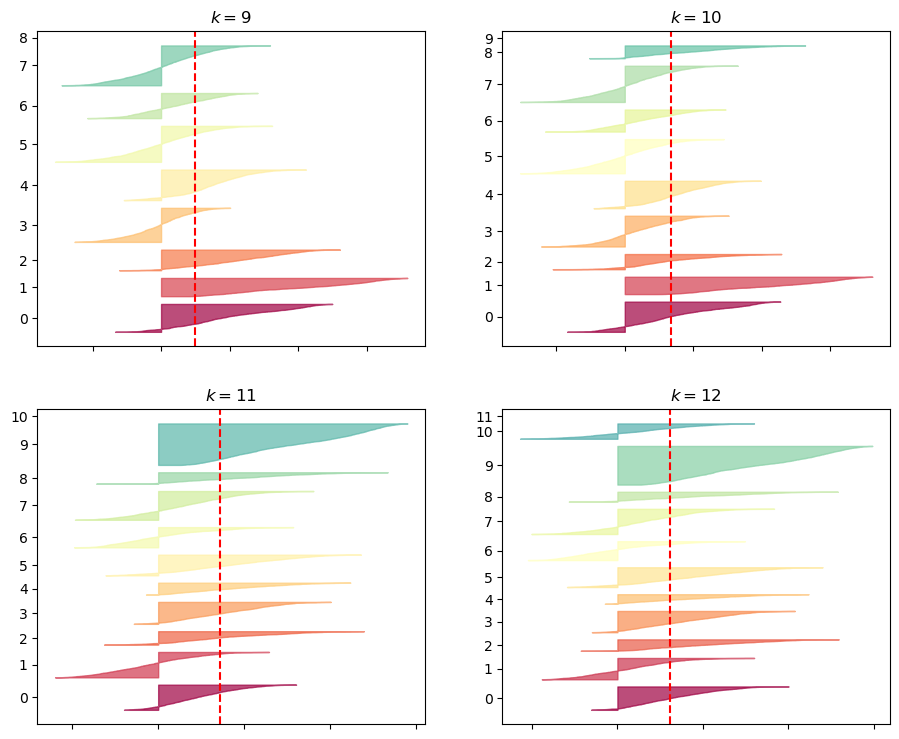

In [37]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (9, 10, 11, 12):
    plt.subplot(2, 2, k - 8)

    y_pred = kmeans[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 8], color="red", linestyle="--")
    plt.title(f"$k={k}$")


plt.show()